In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import torch_AMCDataset
from importlib import reload  

reload(torch_AMCDataset)

<module 'torch_AMCDataset' from '/export/scratch3/bvdp/segmentation/OAR_segmentation/experiments/unet/notebooks/torch_AMCDataset.py'>

In [194]:
root_dir = '/export/scratch3/bvdp/segmentation/data/MODIR_data_preprocessed_train_28-05-2020/'
# meta_path = "/export/scratch3/bvdp/segmentation/OAR_segmentation/experiments/unet/notebooks/dataset_train_09-04-2020.csv"
meta_path = "/export/scratch3/bvdp/segmentation/OAR_segmentation/data_preparation/meta/dataset_train_28-05-2020.csv"
dataset = torch_AMCDataset.AMCDataset(root_dir, meta_path, output_size=512, is_training=True)
dataset_val = torch_AMCDataset.AMCDataset(root_dir, meta_path, output_size=512, is_training=False)

In [272]:
results = {}

for i, (vol, mask) in enumerate(dataset):
    print(i, end=',')
    n_slices = mask.shape[0]
    for cls, cls_idx in dataset.class2idx.items():
#         if cls == 'background':
#             continue
        
        slices = np.where((mask == cls_idx).any(axis=(1,2)))[0]        
        slices_mask = pd.Series(slices >= 0, index=slices).reindex(range(n_slices)).fillna(False).values
        cls_results = results.get(cls, [])
        cls_results.append(slices_mask)
        results[cls] = cls_results

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,

In [327]:
df = pd.DataFrame(results)
df.head(2)

,background,bowel_bag,bladder,hip,rectum
0,"[True, True, True, True, True, True, True, Tru...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
1,"[True, True, True, True, True, True, True, Tru...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."


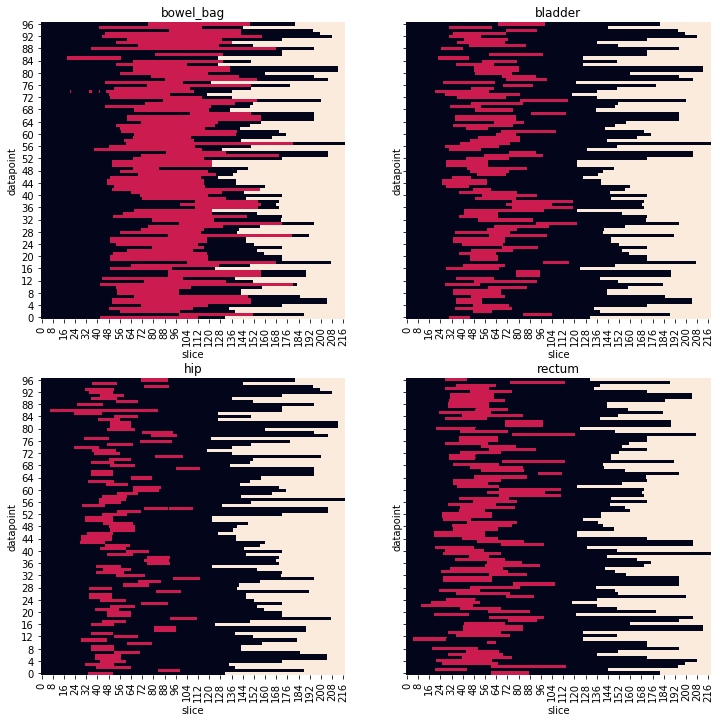

In [300]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12), sharex=False, sharey=True)

for i, cls in enumerate(['bowel_bag', 'bladder', 'hip', 'rectum']):
    df_slice_presence = df[cls].apply(pd.Series).astype(float).fillna(2)
#     df_slice_presence = df[cls].apply(lambda x: pd.Series(x > 0, index=x))
#     df_slice_presence = df_slice_presence.reindex(columns=range(0,max_slices)).fillna(False)
    df_slice_presence.columns = df_slice_presence.columns.rename("slice")
    df_slice_presence.index = df_slice_presence.index.rename("datapoint")
    
    ax = axes.ravel()[i]
    sns.heatmap(df_slice_presence, cbar=False, ax=ax)
    ax.set_title(cls);
    

In [304]:
from functools import reduce

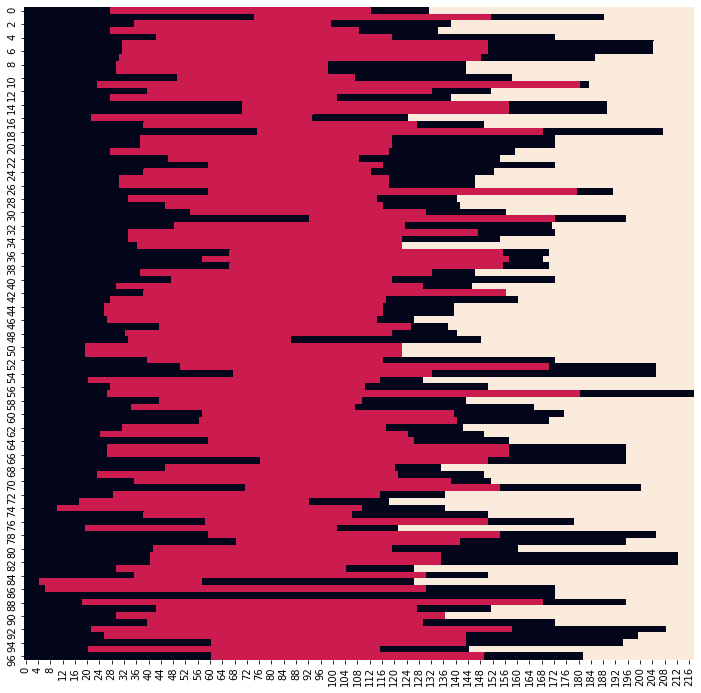

In [320]:
df_classes = df.drop('background', axis=1)
df_presence_any = df_classes.apply(lambda row: reduce(lambda x, y: x | y, row), axis=1).apply(pd.Series).astype(float)
plt.figure(figsize=(12,12))
sns.heatmap(df_presence_any.fillna(2), cbar=False)

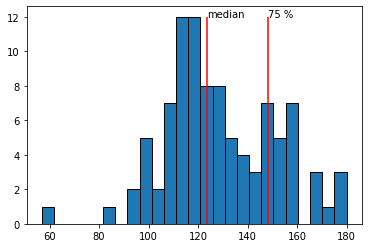

In [406]:
end_slices = df_presence_any.apply(lambda x: x[x == 1].index.max(), axis=1)
ax = end_slices.hist(bins=25, linewidth=1, edgecolor='black', grid=False)
median = end_slices.median()
percentile_75 = end_slices.describe()['75%']
line_height = 12
plt.vlines([median, percentile_75], ymin=0, ymax=line_height, color='red')
ax.annotate("median", (median, line_height))
ax.annotate("75 %", (percentile_75, line_height));

In [363]:
df_presence_any.apply(lambda x: x[x == 1].index.max(), axis=1).describe()

count     96.000000
mean     128.916667
std       22.731229
min       57.000000
25%      115.000000
50%      123.500000
75%      148.250000
max      180.000000
dtype: float64

WEIRD. No labels:
* '/export/scratch3/bvdp/segmentation/data/MODIR_data_preprocessed_train_23-04-2020/3476679937_3399399578'


In [164]:
dataset.meta_df.iloc[87].path

'/export/scratch3/bvdp/segmentation/data/MODIR_data_preprocessed_train_23-04-2020/3476679937_3399399578'

In [323]:
vol, mask = dataset[87]

In [326]:
# mask

In [160]:
vol, mask = dataset[86]

In [161]:
mask.shape

(173, 512, 512)

In [156]:
# plt.imshow(vol[0][40])

In [324]:
np.unique(mask)

array([0])

array([ 43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112])

In [24]:
s,x,y = np.where(mask == 1)


array([ 43,  43,  43, ..., 112, 112, 112])